**RawUberData**

This directory contains data on over 5 Lakhs Uber pickups in New York City from April 2014.

FiveThirtyEight obtained the data from the NYC Taxi & Limousine Commission (TLC) by submitting a Freedom of Information Law request on July 20, 2015.
The TLC has sent us the data in batches as it continues to review trip data Uber and other HFV companies have submitted to it.
The TLC's correspondence with FiveThirtyEight is included in the files TLC_letter.pdf, TLC_letter2.pdf and TLC_letter3.pdf.
TLC records requests can be made here.

This data was used for four FiveThirtyEight stories: Uber Is Serving New York’s Outer Boroughs More Than Taxis Are, Public Transit Should Be Uber’s New Best Friend, Uber Is Taking Millions Of Manhattan Rides Away From Taxis, and Is Uber Making NYC Rush-Hour Traffic Worse?.

In the folder uber-trip-data, there are six files of raw data on Uber pickups in New York City from April to September 2014. The files are separated by month and each has the following columns:

Header Definition

1.Date/Time: The date and time of the Uber pickup

2.Lat: The latitude of the Uber pickup

3.Lon: The longitude of the Uber pickup

4.Base: The TLC base company code affiliated with the Uber pickup



Importing Necessary Libraries

In [2]:
%pylab inline
import pandas as pd
import seaborn as sns   # <-- fixed (proper way to use seaborn)
from builtins import list
from subprocess import check_output

# If dataset is in current folder, use "./"
print(check_output(["ls", "./"]).decode("utf8"))


Populating the interactive namespace from numpy and matplotlib
sample_data



Loading CSV file into memory

In [4]:
data = pd.read_csv("/content/uber-raw-data.csv")

In [5]:
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


Convert Date Time

In [6]:
data ['Date/Time'] = data ['Date/Time'].map(pd.to_datetime)

In [7]:
data.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [8]:
data.tail()

,Date/Time,Lat,Lon,Base
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764


In [9]:
def get_dom(dt):
    return dt.day
data['dom'] = data['Date/Time'].map(get_dom)

In [10]:
data.head()

,Date/Time,Lat,Lon,Base,dom
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1


In [11]:
def get_weekday(dt):
    return dt.weekday()

data['weekday'] = data['Date/Time'].map(get_weekday)

def get_hour(dt):
    return dt.hour

data['hour'] = data['Date/Time'].map(get_hour)

data.tail()


,Date/Time,Lat,Lon,Base,dom,weekday,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


**ANALYSIS**

Analysis of the DoM

Text(0.5, 1.0, 'Frequency by DoM - uber - Apr 2014')

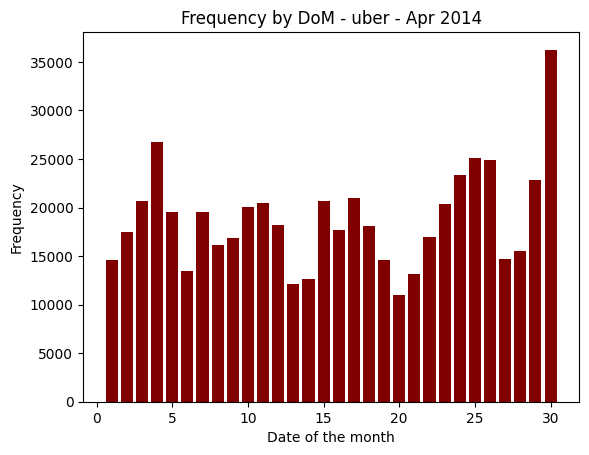

In [12]:
hist(data.dom, bins=30, rwidth=.8, color='#800000', range=(0.5, 30.5))
xlabel('Date of the month')
ylabel('Frequency')
title('Frequency by DoM - uber - Apr 2014')

In [13]:
#for k, rows in data.groupby('dom'):
#print((k, len(rows)))

def count_rows(rows):
    return len(rows)

by_date = data.groupby('dom').apply(count_rows)
by_date

/tmp/ipython-input-1469168380.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  by_date = data.groupby('dom').apply(count_rows)


,0
dom,
1,14546
2,17474
3,20701
4,26714
5,19521
6,13445
7,19550
8,16188
9,16843


<BarContainer object of 30 artists>

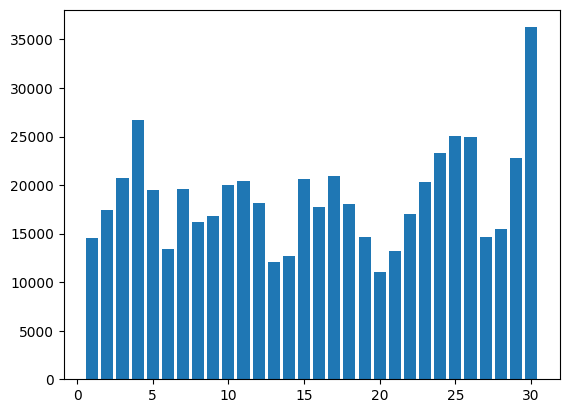

In [14]:
bar(range(1, 31), by_date)

In [15]:
by_date_sorted = by_date.sort_values()
by_date_sorted

,0
dom,
20,11017
13,12112
14,12674
21,13162
6,13445
1,14546
19,14602
27,14677
28,15475


Text(0.5, 1.0, 'Frequency by DoM - uber - Apr 2014')

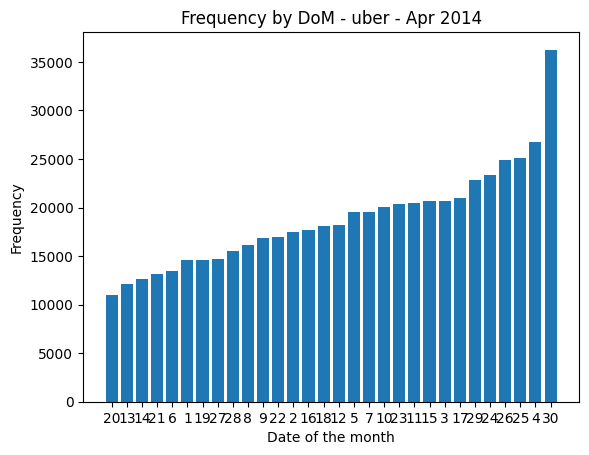

In [16]:
bar(range(1, 31), by_date_sorted)
xticks(range(1,31), by_date_sorted.index)
xlabel('Date of the month')
ylabel('Frequency')
title('Frequency by DoM - uber - Apr 2014')

Analysis of the hour

(array([ 7769.,  4935.,  5040.,  6095.,  9476., 18498., 24924., 22843.,
        17939., 17865., 18774., 19425., 22603., 27190., 35324., 42003.,
        45475., 43003., 38923., 36244., 36964., 30645., 20649.,     0.]),
 array([ 0.5       ,  1.47916667,  2.45833333,  3.4375    ,  4.41666667,
         5.39583333,  6.375     ,  7.35416667,  8.33333333,  9.3125    ,
        10.29166667, 11.27083333, 12.25      , 13.22916667, 14.20833333,
        15.1875    , 16.16666667, 17.14583333, 18.125     , 19.10416667,
        20.08333333, 21.0625    , 22.04166667, 23.02083333, 24.        ]),
 <BarContainer object of 24 artists>)

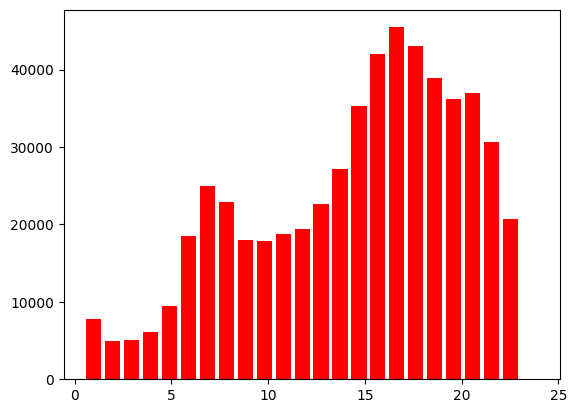

In [17]:
hist(data.hour, bins=24, range=(.5, 24), rwidth=.8, color='#FF0000')


Analysis of the Weekday

([<matplotlib.axis.XTick at 0x7e1a544e9a50>,
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tue'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thu'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

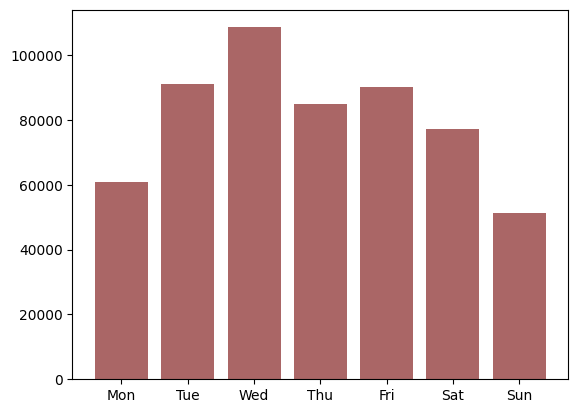

In [18]:
hist(data.weekday, bins=7, range =(-.5,6.5), rwidth=.8, color='#AA6666')
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())

Color Analysis (hour,dow)

/tmp/ipython-input-748439468.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  by_cross = data.groupby('weekday hour'.split()).apply(count_rows).unstack()


<Axes: xlabel='hour', ylabel='weekday'>

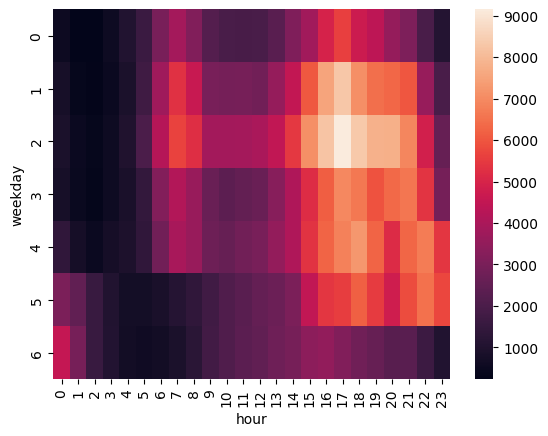

In [19]:
by_cross = data.groupby('weekday hour'.split()).apply(count_rows).unstack()
seaborn.heatmap(by_cross)

Lat and Lon

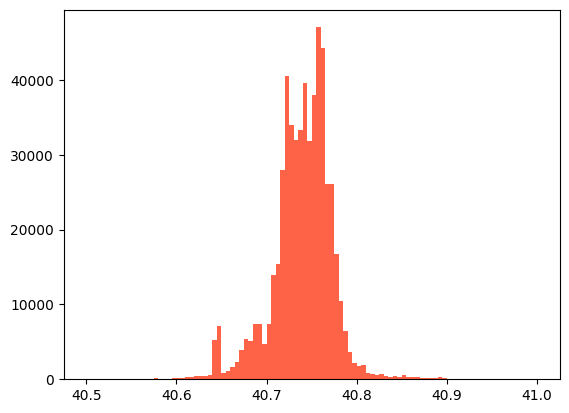

In [20]:
hist(data['Lat'], bins=100, range = (40.5, 41), color='#FF6347');

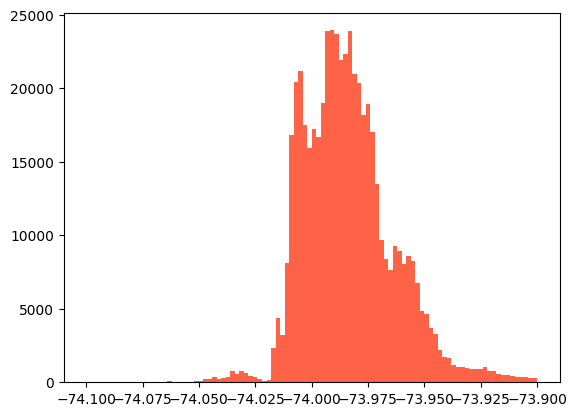

In [21]:
hist(data['Lon'], bins=100, range = (-74.1, -73.9), color='#FF6347');


''

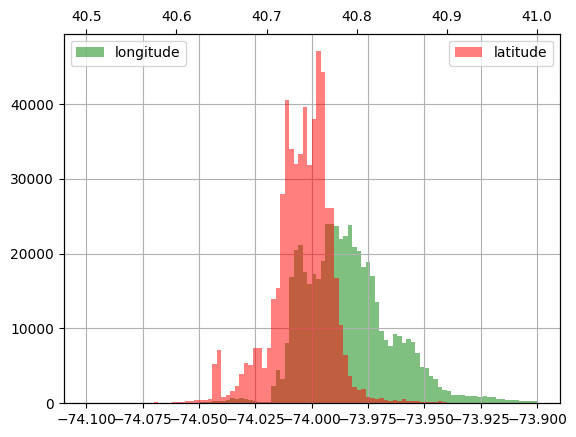

In [22]:
hist(data['Lon'], bins=100, range = (-74.1, -73.9), color='g', alpha=.5, label = 'longitude')
grid()
legend(loc='upper left')
twiny()
hist(data['Lat'], bins=100, range = (40.5, 41), color='r', alpha=.5, label = 'latitude')
legend(loc='best')
;

(40.7, 41.0)

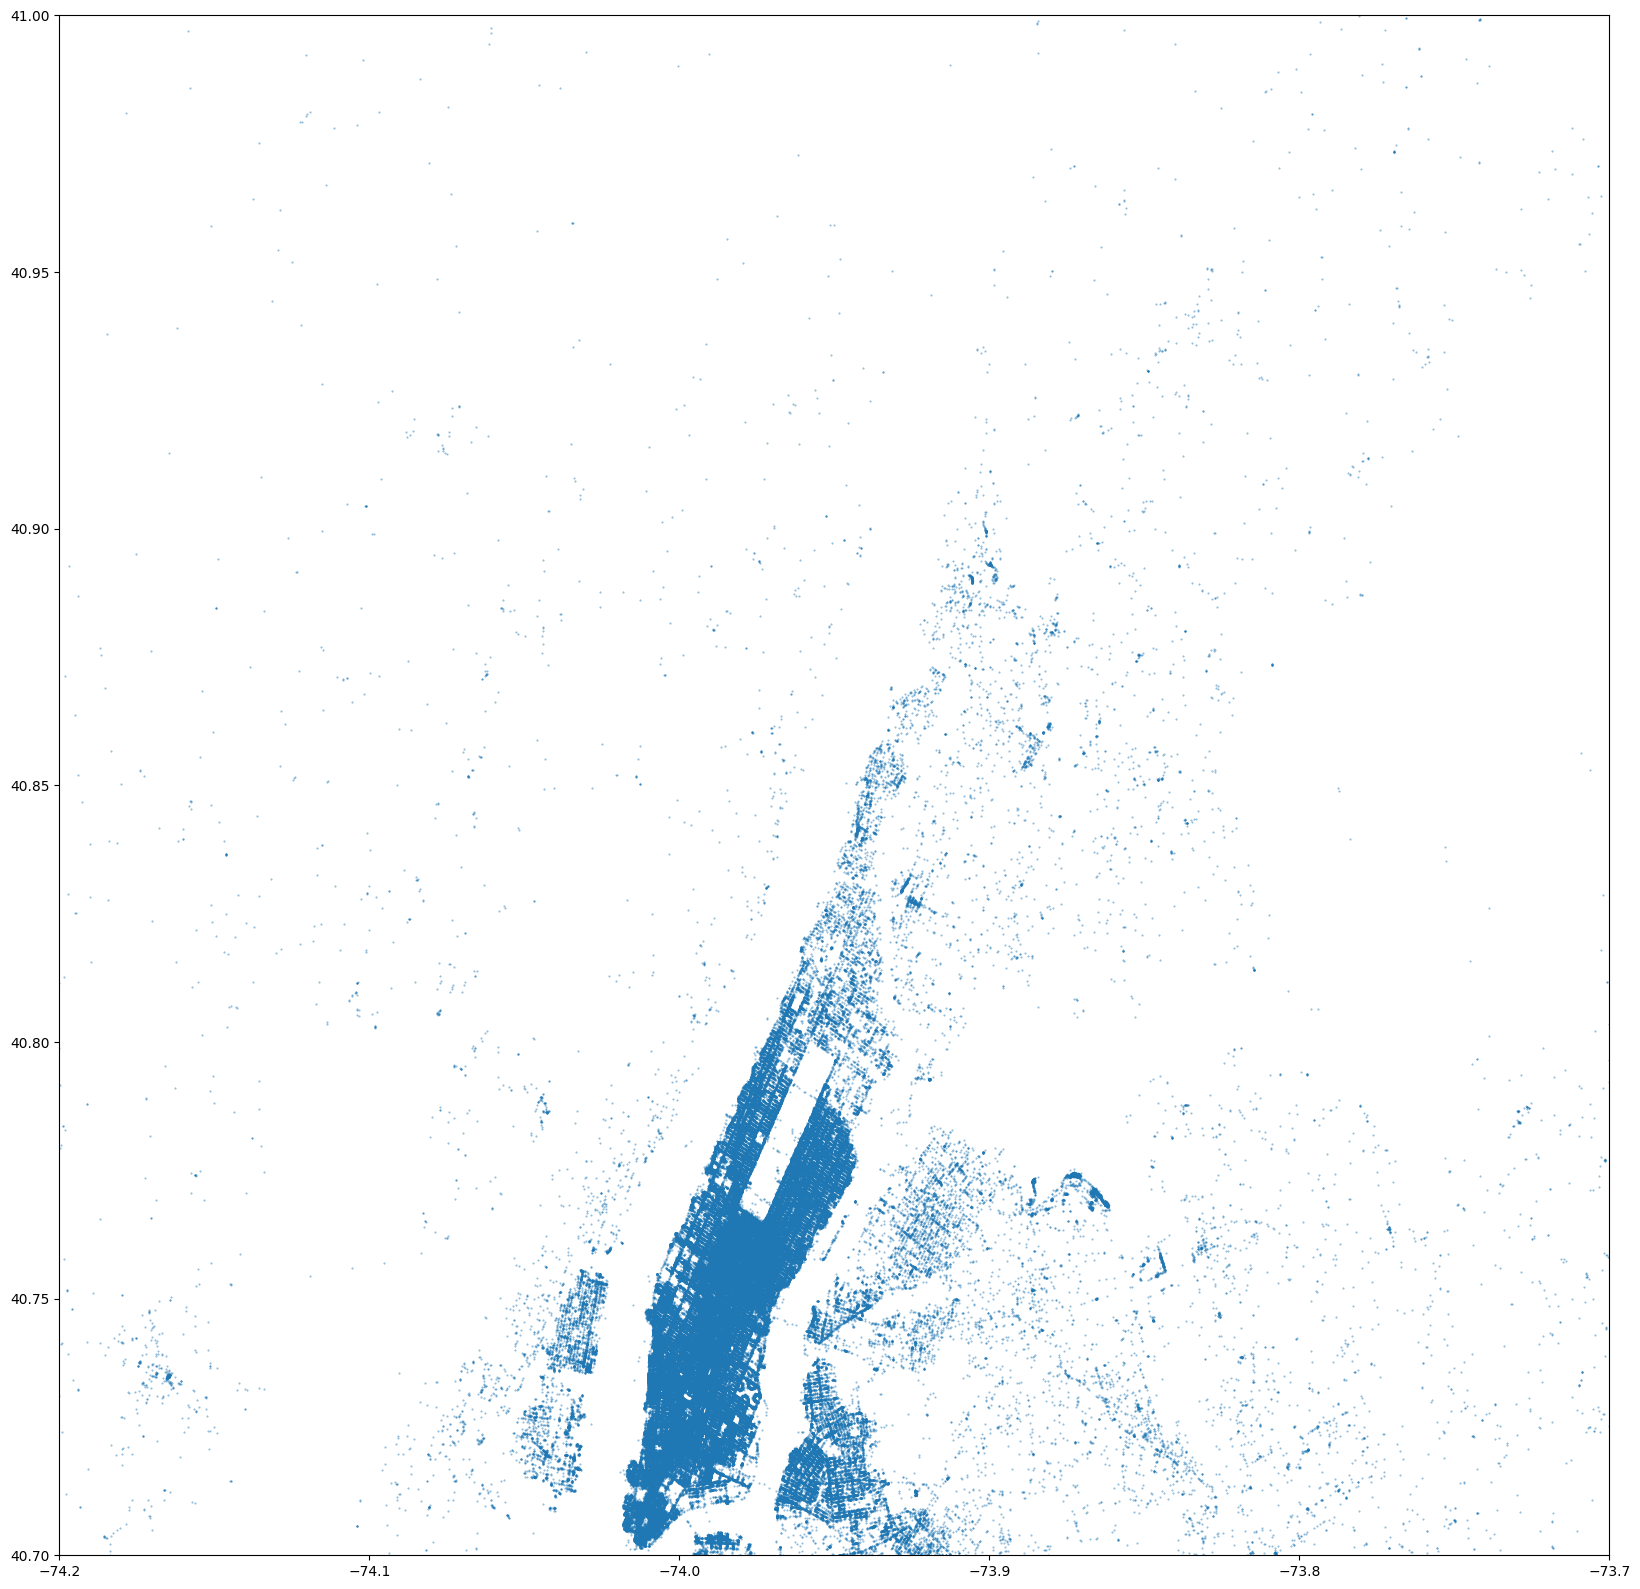

In [23]:
figure(figsize=(20, 20))
plot(data['Lon'], data['Lat'], '.', ms=1, alpha=.5)
xlim(-74.2, -73.7)
ylim(40.7, 41)